In [ ]:
import albumentations as A
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)
    plt.show()


def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


# From https://albumentations.ai/docs/examples/example_bboxes/
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img


In [ ]:
image = Image.open('elon.jpeg')
image

Output hidden; open in https://colab.research.google.com to view.

# Classification

In [ ]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p = 0.9),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5)
    ], p=1.0)
])

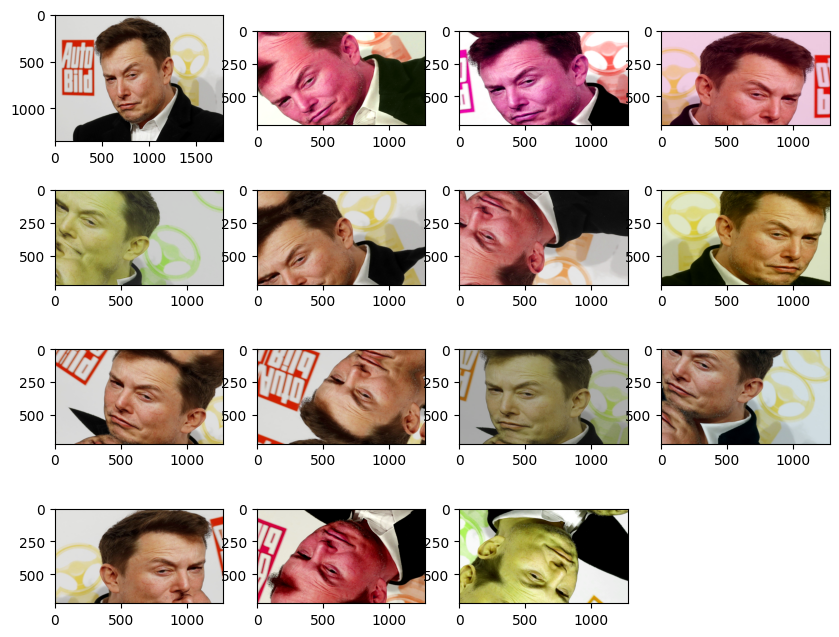

In [ ]:
images_list = [image]
image = np.array(image)
for i in range(15):
  augmentations = transform(image=image)
  augmented_img = augmentations['image']
  images_list.append(augmented_img)

plot_examples(images_list)

We can see that after rotation "out areas" was reflected with image edges. So its not cool for future preprocessing

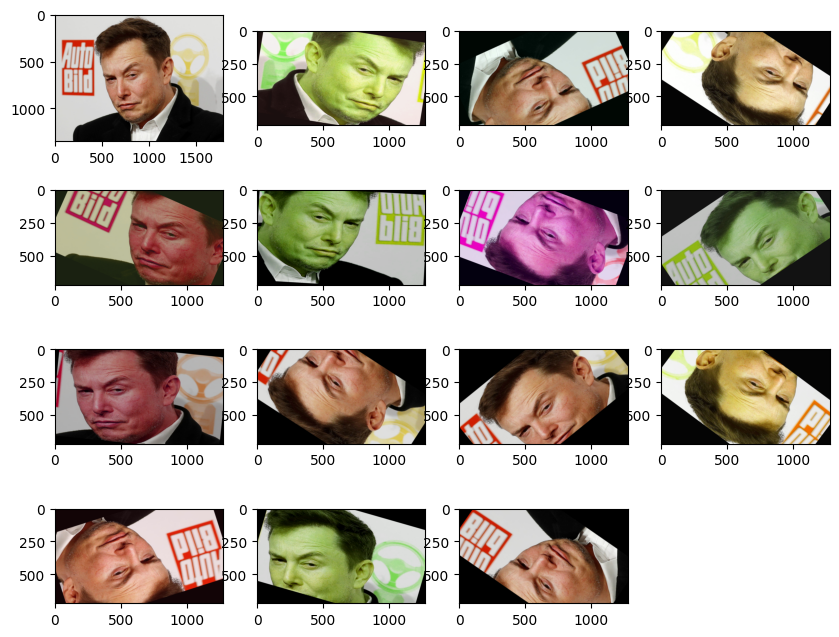

In [ ]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p = 0.9, border_mode=cv2.BORDER_CONSTANT), #<---------------
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5)
    ], p=1.0)
])

images_list = [image]
image = np.array(image)
for i in range(15):
  augmentations = transform(image=image)
  augmented_img = augmentations['image']
  images_list.append(augmented_img)

plot_examples(images_list)

# Segmentation

In [ ]:
image = Image.open("elon.jpeg")
mask = Image.open("mask.jpeg")
np.array(mask).shape, np.array(image).shape

((1350, 1790, 3), (1350, 1797, 3))

(1350, 1790, 3) (1350, 1790, 3)


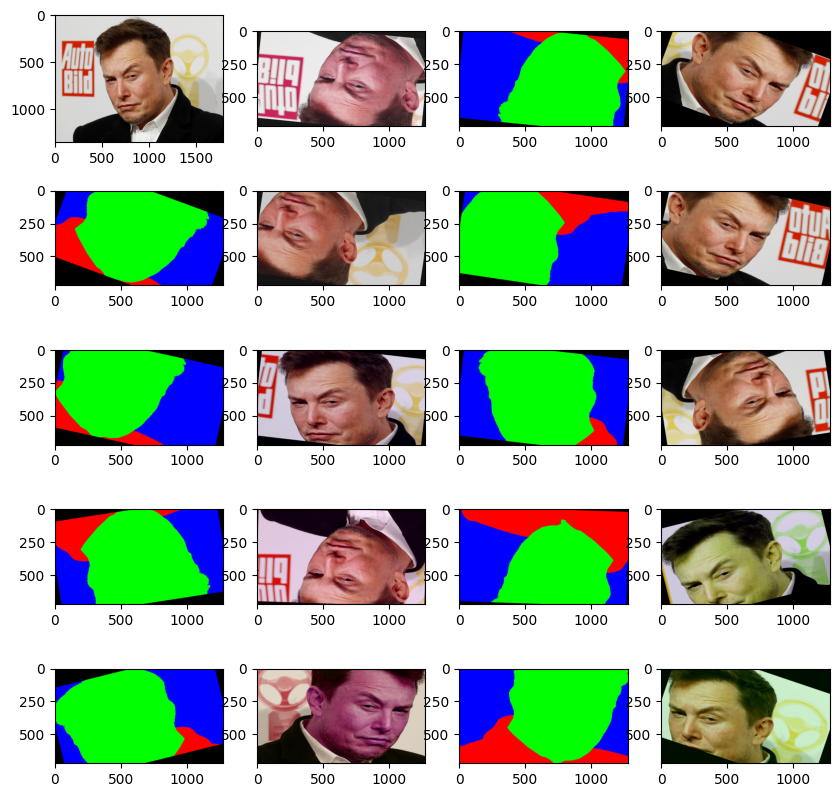

In [ ]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p = 0.9, border_mode=cv2.BORDER_CONSTANT), #<---------------
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5)
    ], p=1.0)
])

images_list = [image]
image = np.array(image)[:, 3:1793 ,:] # if wigth or heigth of image and mask not equal it will rise error
mask = np.array(mask)
print(mask.shape, image.shape)
for i in range(10):
  augmentations = transform(image=image, mask=mask)
  augmented_img = augmentations['image']
  augmented_mask = augmentations['mask']
  images_list.append(augmented_img)
  images_list.append(augmented_mask)
plot_examples(images_list)

# Detection

In [ ]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]]

(1350, 1790, 3) (480, 640, 3)


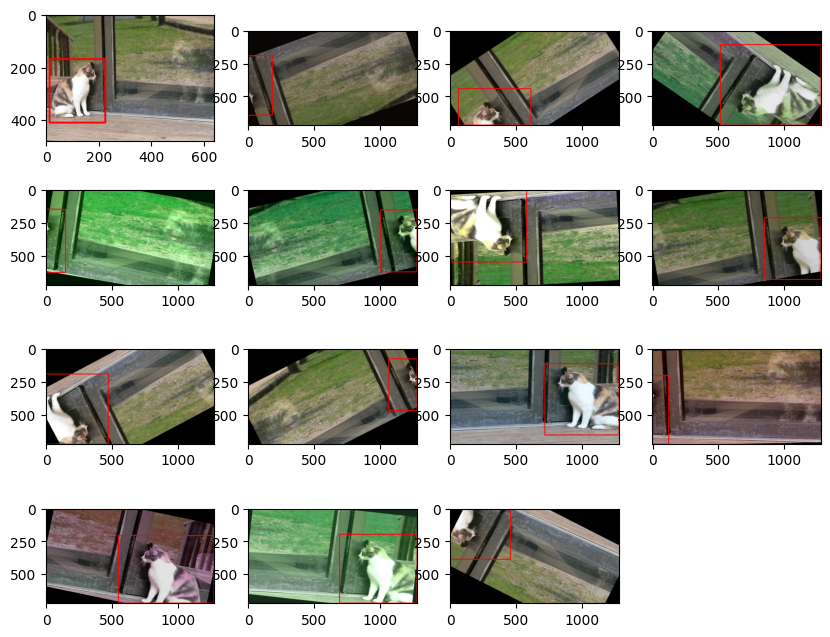

In [ ]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p = 0.9, border_mode=cv2.BORDER_CONSTANT), #<---------------
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5)
    ], p=1.0)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=[])
)

images_list = [image]
saved_bboxes = [bboxes[0]]
print(mask.shape, image.shape)
for i in range(15):
  augmentations = transform(image=image, bboxes=bboxes)
  augmented_img = augmentations['image']
  images_list.append(augmented_img)
  saved_bboxes.append(augmentations['bboxes'][0])
plot_examples(images_list, saved_bboxes)

After rotation bboxes become larger and some bboxes are outside figure because of crop, so we need to add some lines to make code work correctly.

(1350, 1790, 3) (480, 640, 3)


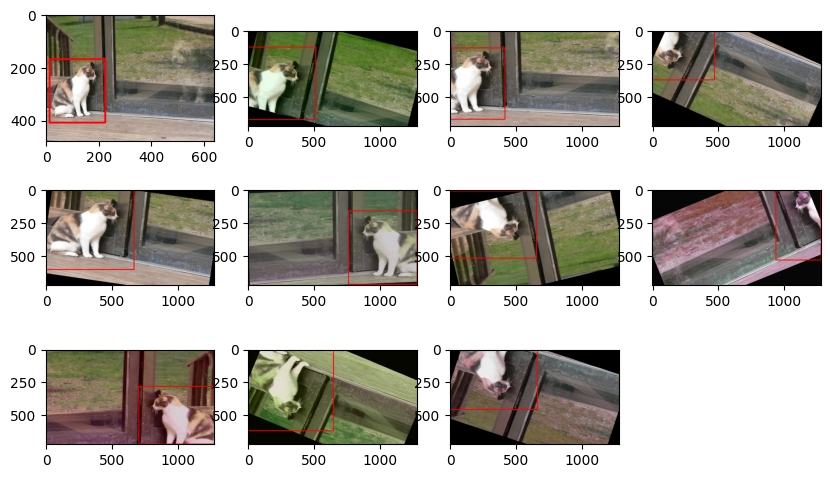

In [ ]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]]
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p = 0.9, border_mode=cv2.BORDER_CONSTANT), #<---------------
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5)
    ], p=1.0)
], bbox_params=A.BboxParams(format='pascal_voc', min_area=2048, min_visibility=0.3, label_fields=[]) #<-----------------
)

images_list = [image]
saved_bboxes = [bboxes[0]]
print(mask.shape, image.shape)
for i in range(15):
  augmentations = transform(image=image, bboxes=bboxes)
  augmented_img = augmentations['image']

  if len(augmentations['bboxes']) == 0:
    continue
  images_list.append(augmented_img)
  saved_bboxes.append(augmentations['bboxes'][0])
plot_examples(images_list, saved_bboxes)